In [1]:
import pandas as pd
import numpy as np
from datetime import date
import xlrd
import seaborn as sns
from matplotlib import pyplot as plt
from PIL import Image

### Data Preprocessing

#### Read in data

In [2]:
cab = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer = pd.read_csv("Customer_ID.csv")
transaction = pd.read_csv("Transaction_ID.csv")

In [3]:
cab.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


In [4]:
city.head(3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"


In [5]:
customer.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


In [6]:
transaction.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


#### Merge Data

In [7]:
data = cab.merge(transaction, on = "Transaction ID", how = "left")

In [8]:
data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash


In [9]:
data1 = data.merge(customer, on = "Customer ID", how = "left")

In [10]:
data1.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242


In [11]:
df = data1.merge(city, on = "City", how = "left")

In [12]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


In [13]:
df['Date'] = ""

for i in range(len(df)):
    datetime_date = xlrd.xldate_as_datetime(df['Date of Travel'].loc[i], 0)
    date_object = datetime_date.date()
    df['Date'].loc[i] = date_object

/var/folders/rz/3l6s6lrn5jg56g_hd0gzw7580000gn/T/ipykernel_18273/3879047127.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'].loc[i] = date_object


In [14]:
df.head(3)
df1 = df.copy()

#### Check NA Values

In [16]:
df1.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
Date                  0
dtype: int64

#### Check duplicated values

In [17]:
duplicate = df1[df1.duplicated()]

In [18]:
duplicate

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date


#### Check outliers & Summary Statistics

In [19]:
df1.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


**For the column Price Charged, the outlier seems evident. But no other features can validate the reason for such huge**

#### Construct new columns

In [20]:
df1['Profit'] = df1['Price Charged'] - df1['Cost of Trip']
df1['Year'] = pd.to_datetime(df1['Date']).dt.to_period('Y')

In [21]:
len(df1)

359392

In [22]:
df1.to_csv('cabdata1.csv')

### Assumption 1
**Do metropolitans with large population have higher average than other areas?**

**It took too long to finish running the command line. Thus, I switched to Tableau.**

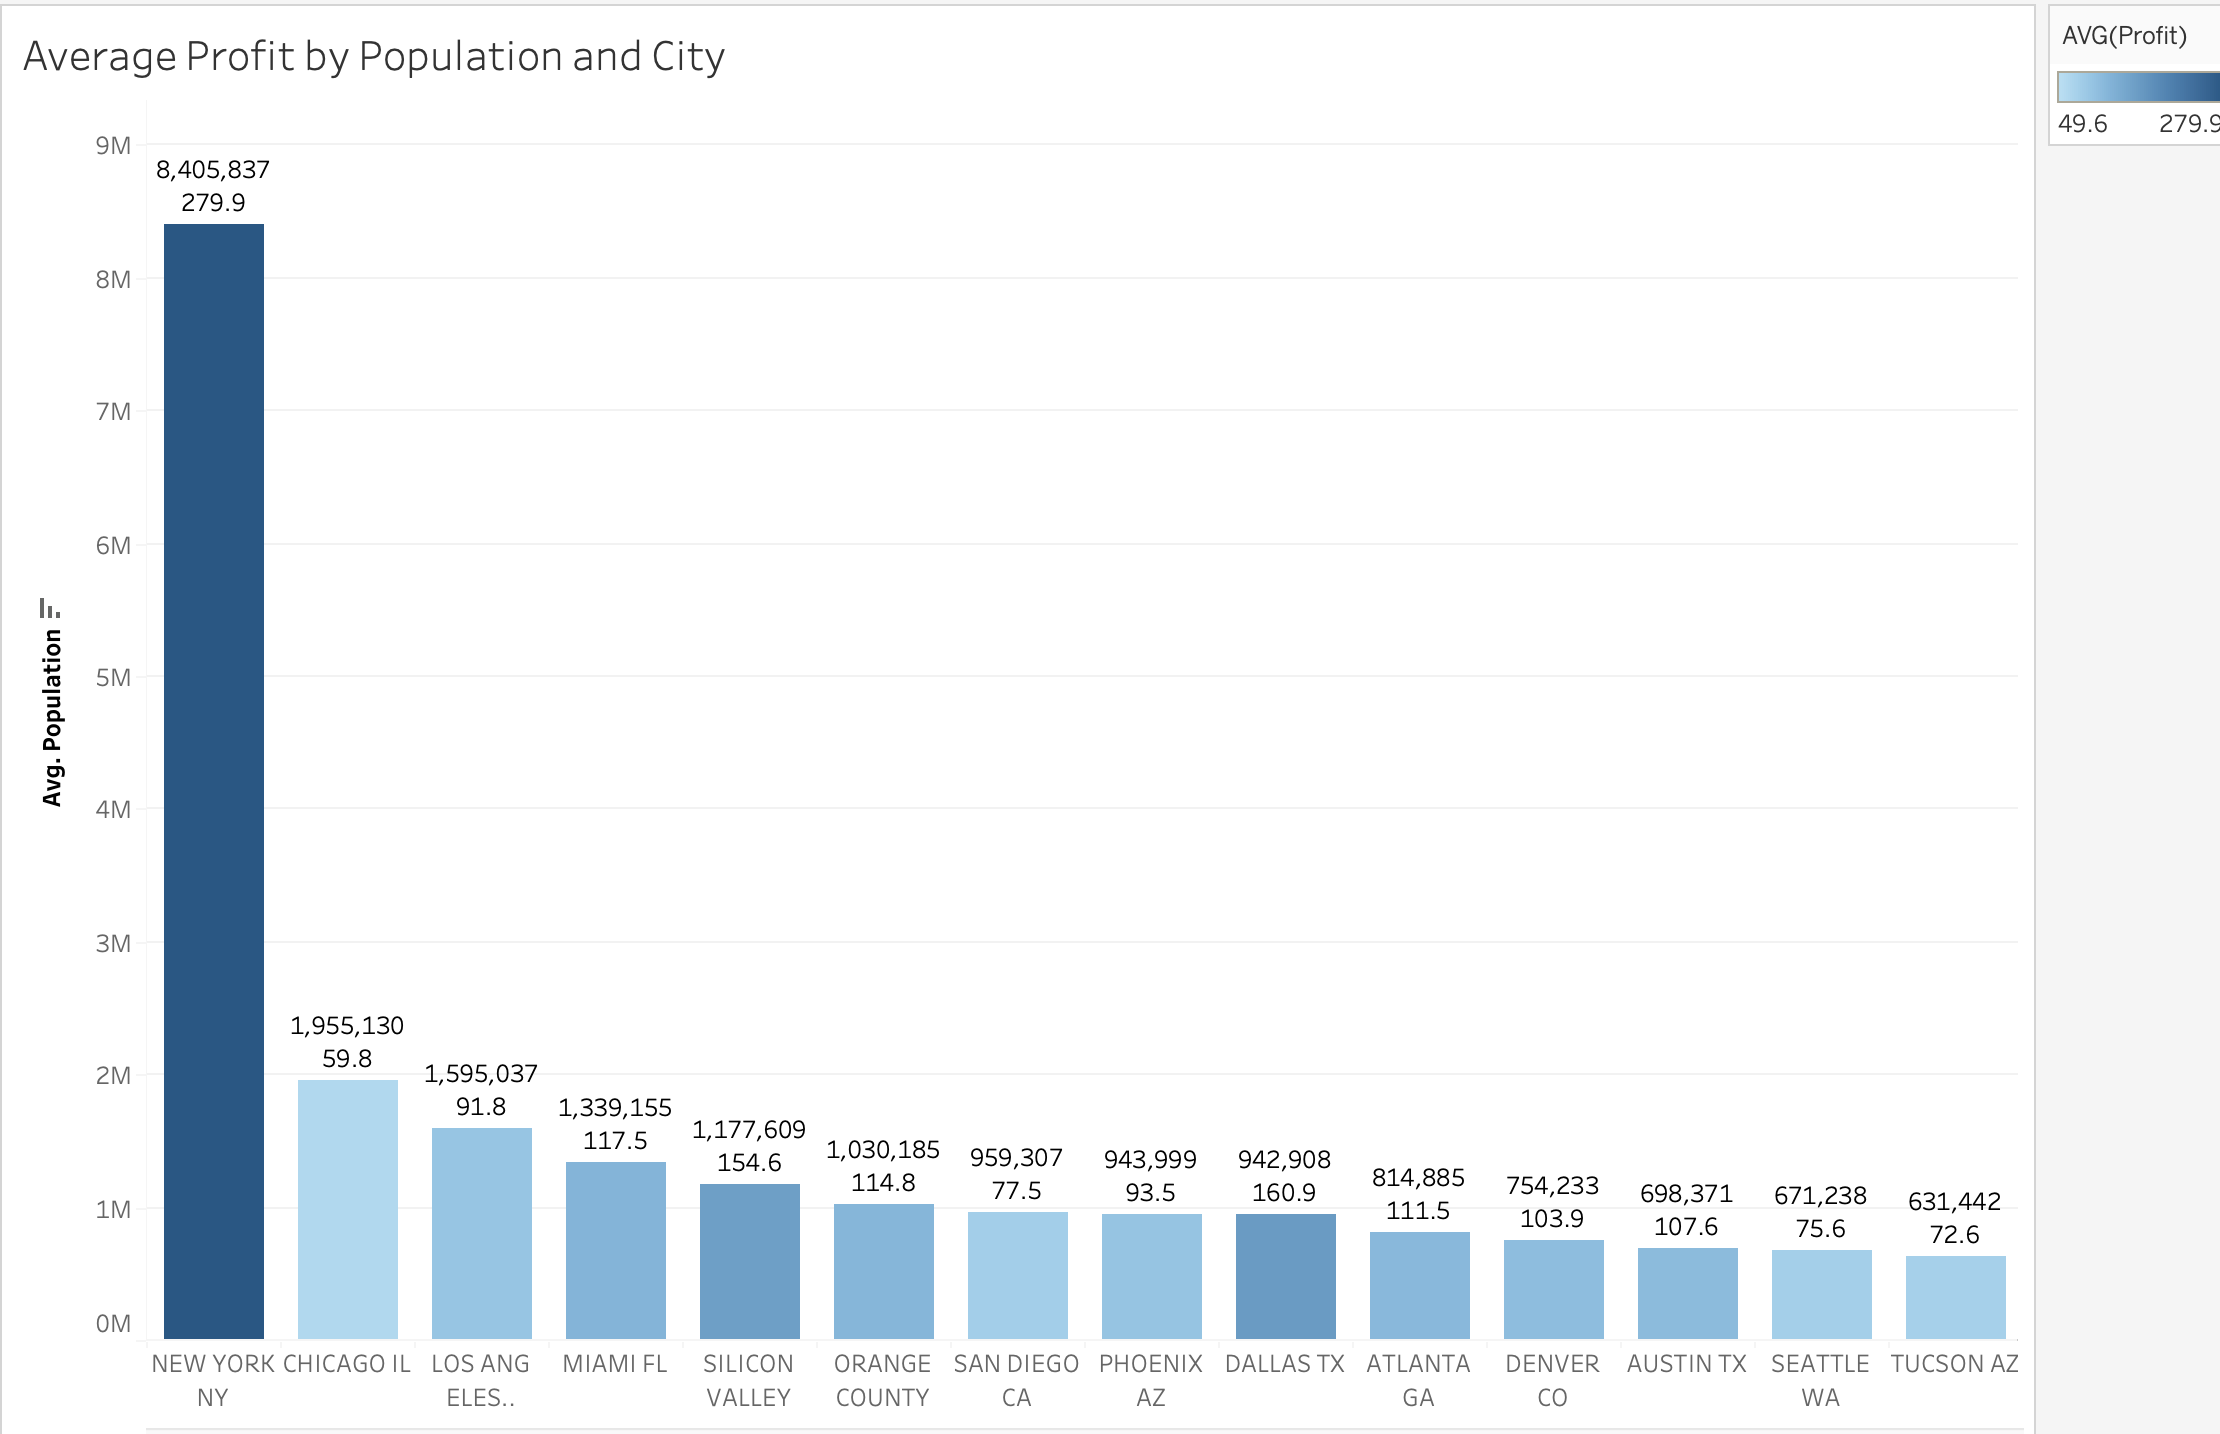

**It is surprising to see that cities with larger population may not have relatively high average profits. Dallas has less population but a relatively high average profits.**

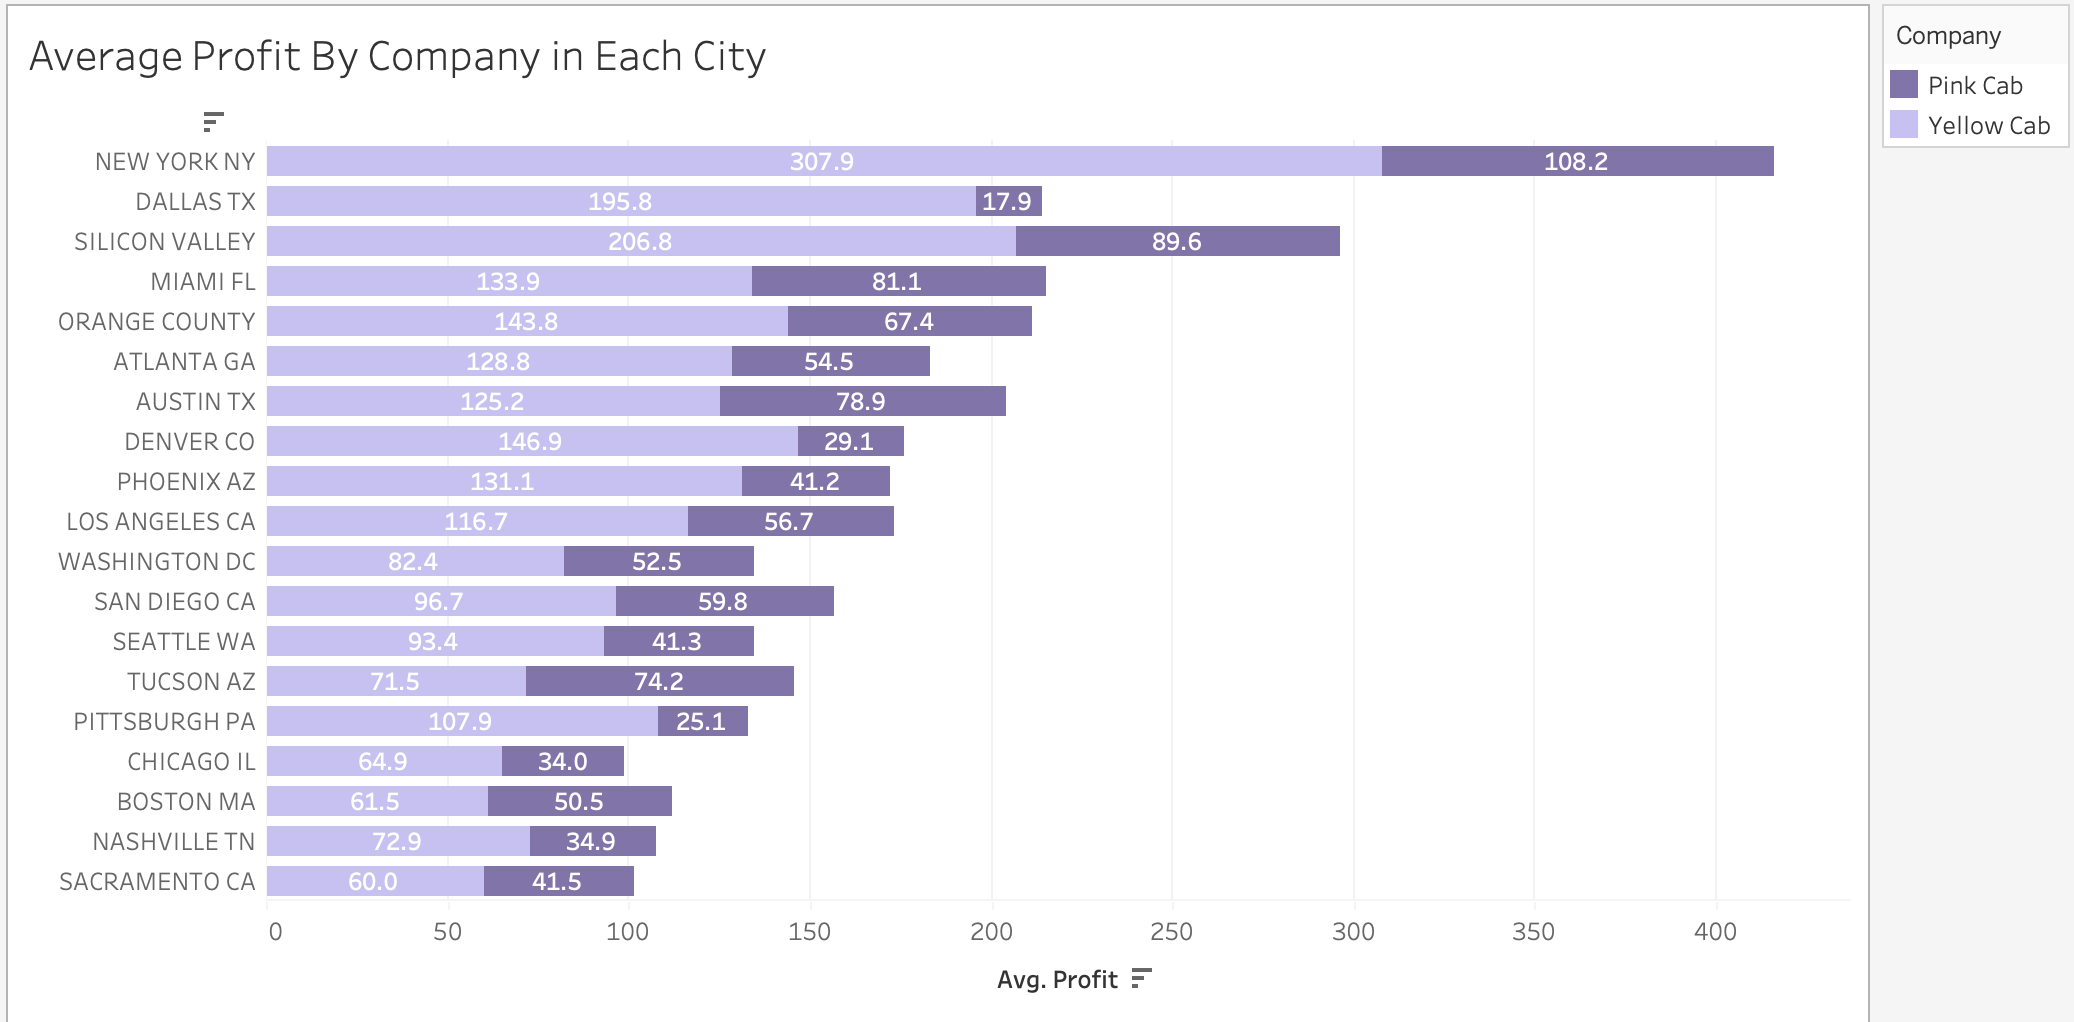

**By breaking down, it is appearent Yellow Cab generates more profits.**

In [23]:
(df1['Company'] == 'Yellow Cab').sum()

274681

In [24]:
(df1['Company'] == 'Pink Cab').sum()

84711

### Assumption 2
**Do cities where people have high income level tend to generate higher profits?**

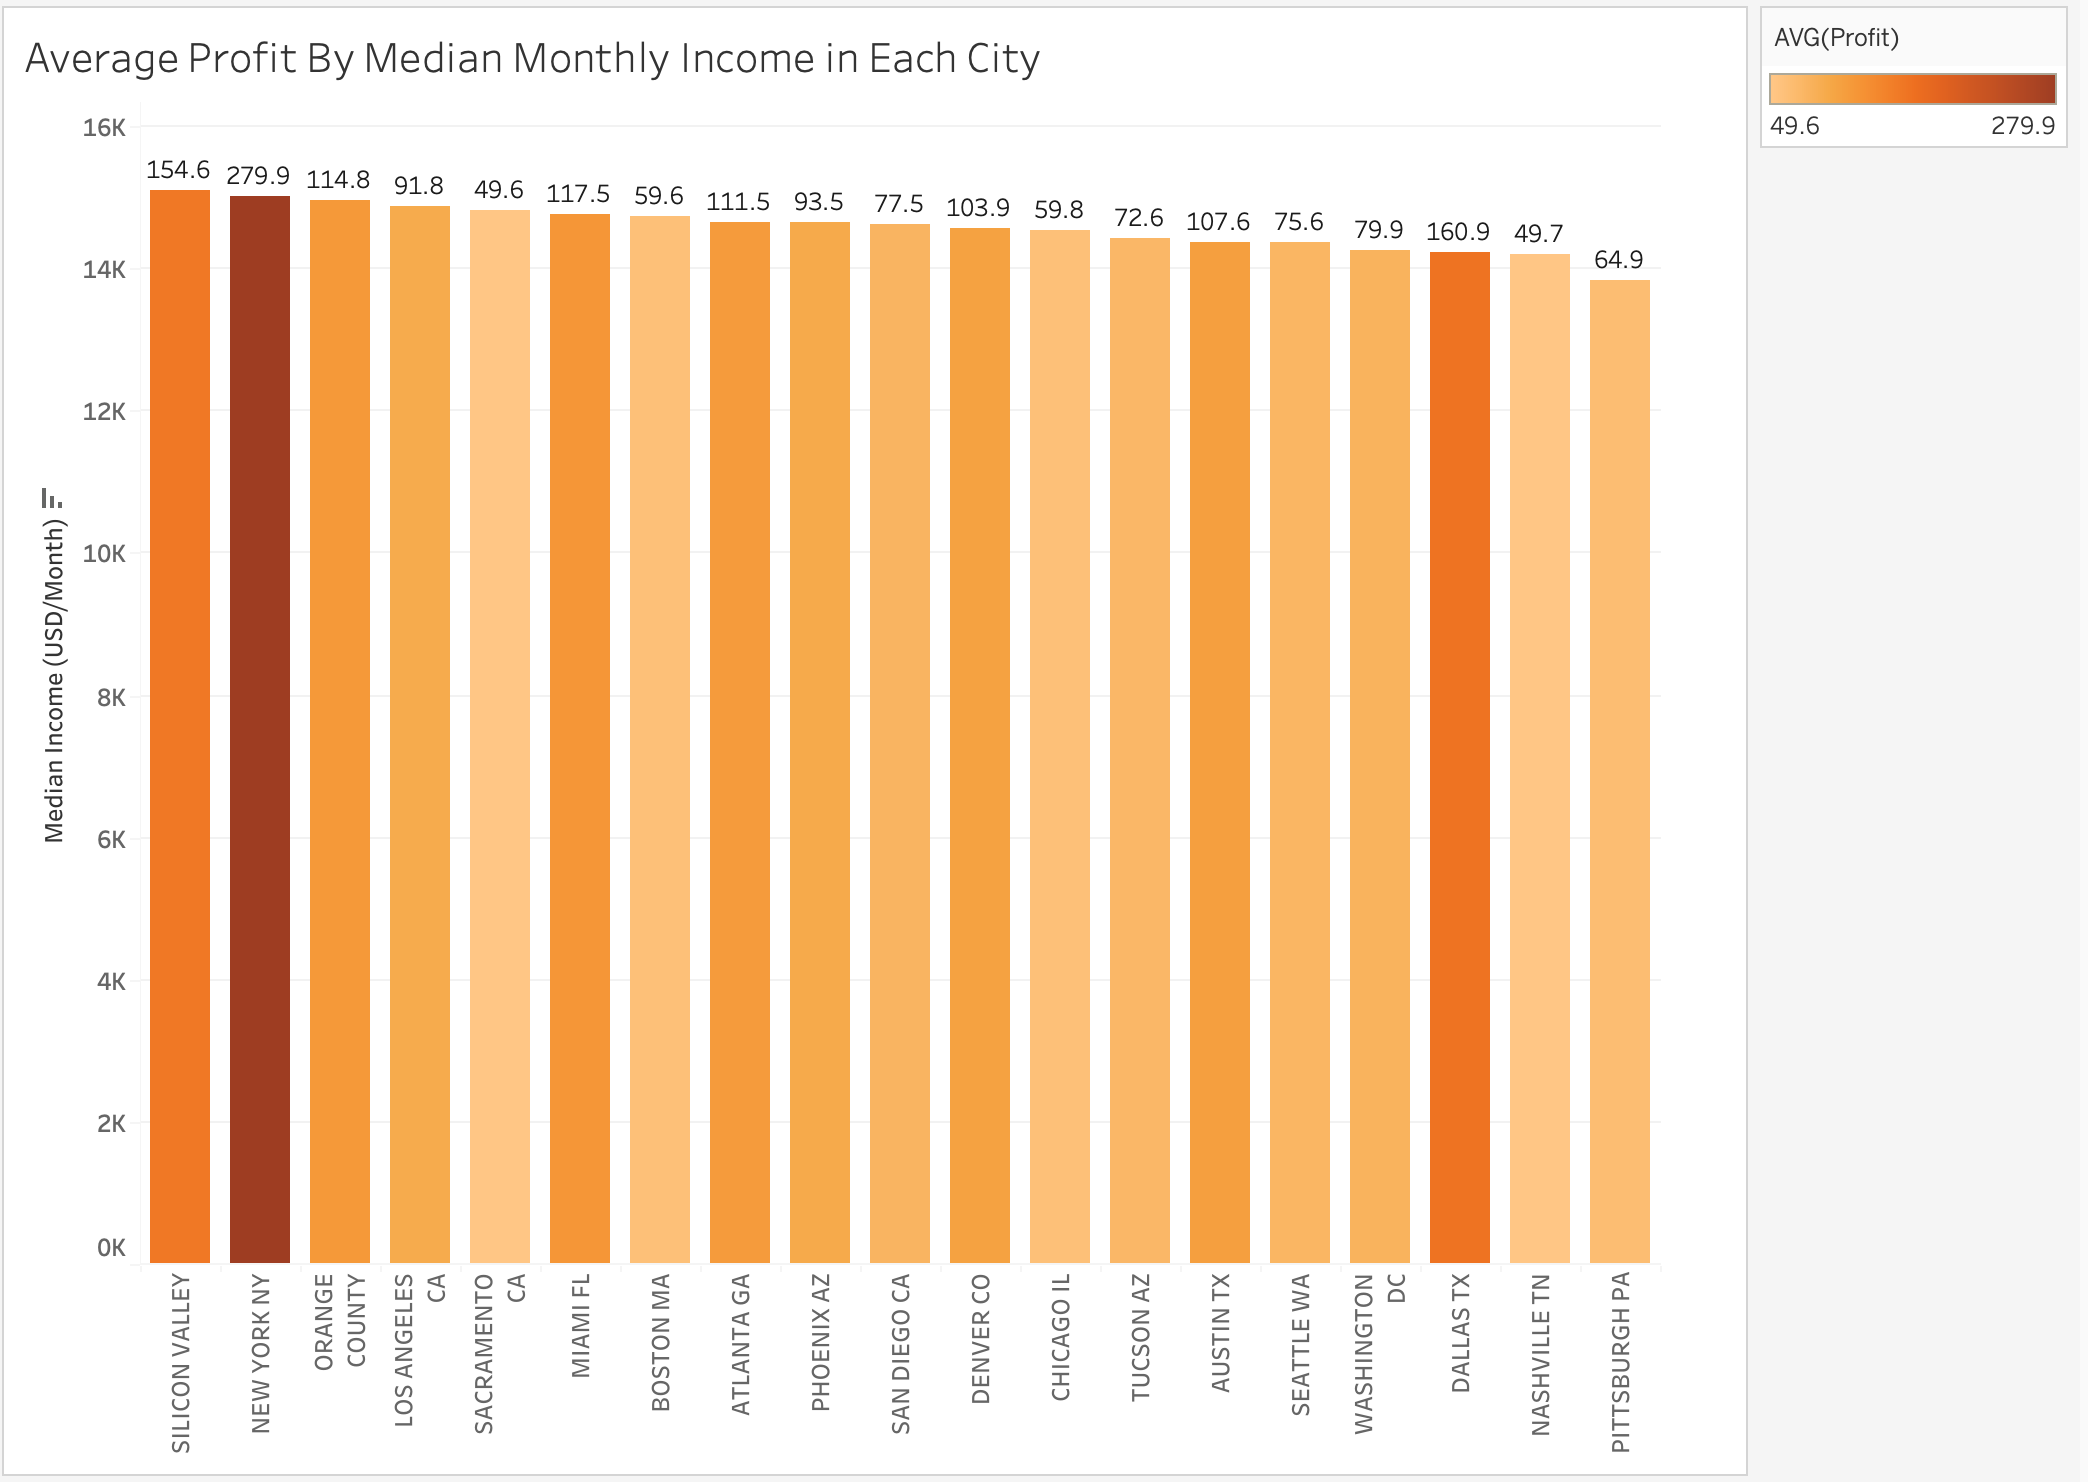

**By sorting cities according to its median income level, cities with high median income level may not have a relatively high average cab profit.**

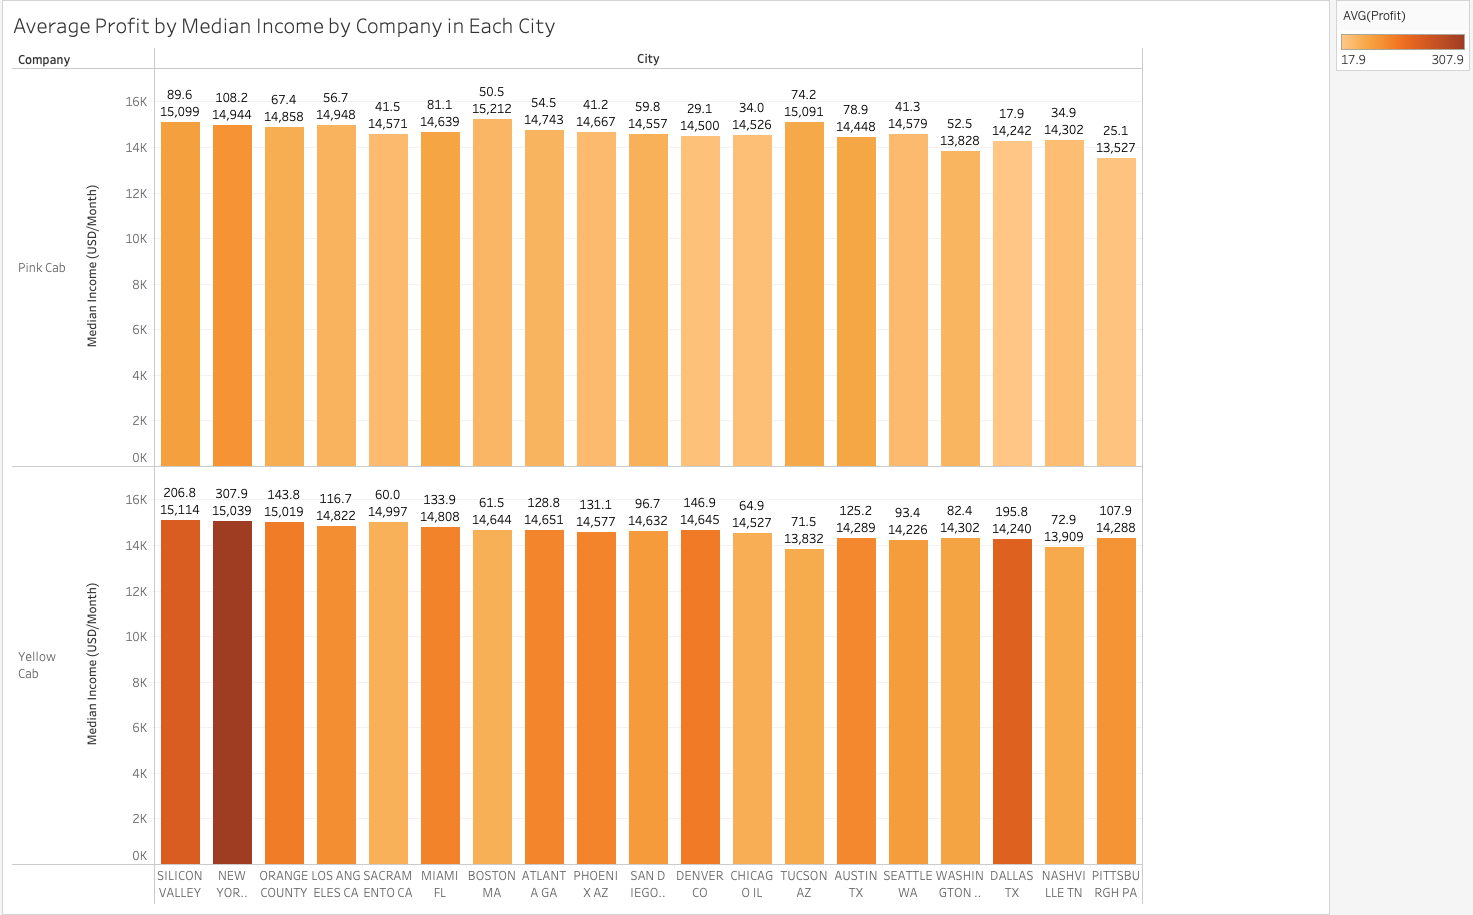

**For most of the cities, Yellow Cab has higher average profits. But there is one exception, Tucson AZ. By looking Yellow Cab company separately, cities with higher median income level may not have high profits. Orange county has less profits than that of Dallas.**

### Assumption 3
**Does profits have seasonality?**

In [25]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,Date
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701",2016-01-08
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701",2016-01-06
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701",2016-01-02
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701",2016-01-07
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701",2016-01-03


In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

df2 = df.copy()

In [27]:
df2['Profit'] = df1['Profit']

In [28]:
df2['Year']=df1['Year']
df2['Month'] = pd.to_datetime(df1['Date']).dt.to_period('M')

In [29]:
yellow = df2[df2['Company'] == 'Yellow Cab']
pink = df2[df2['Company'] == 'Pink Cab']

In [30]:
yanalysis = yellow.groupby('Month')[['Profit']].mean()
panalysis = pink.groupby('Month')[['Profit']].mean()

In [31]:
yanalysis.interpolate(inplace = True)
panalysis.interpolate(inplace = True)
yanalysis.index=yanalysis.index.to_timestamp()
panalysis.index=panalysis.index.to_timestamp()

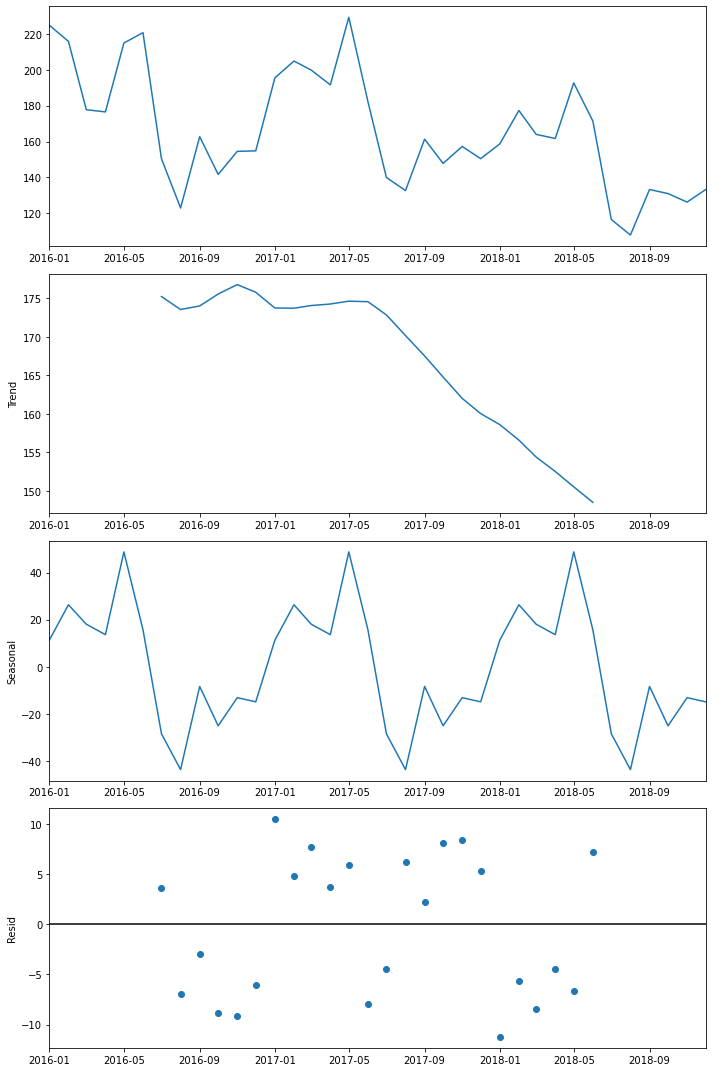

In [32]:
plt.rcParams['figure.figsize'] = [10, 15]

decompose_result_mult = seasonal_decompose(yanalysis, model = 'additive')

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()
plt.show()

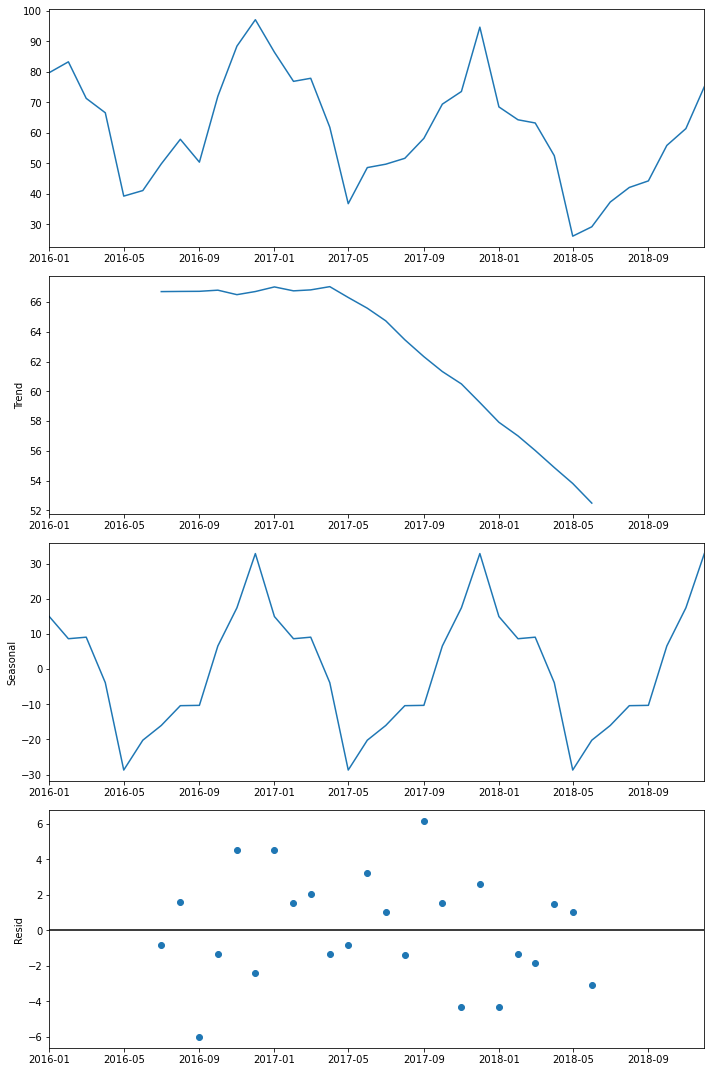

In [33]:
plt.rcParams['figure.figsize'] = [10, 15]

decompose_result_mult = seasonal_decompose(panalysis, model = 'additive')

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot()
plt.show()

**Two companies show different seasonality. Yellow Cab has peaks around the mid of a year while Pink Cab has peaks around the end of the year.**

### Assumption 4
**Is the number of customers positively related to the profits? What about age?**

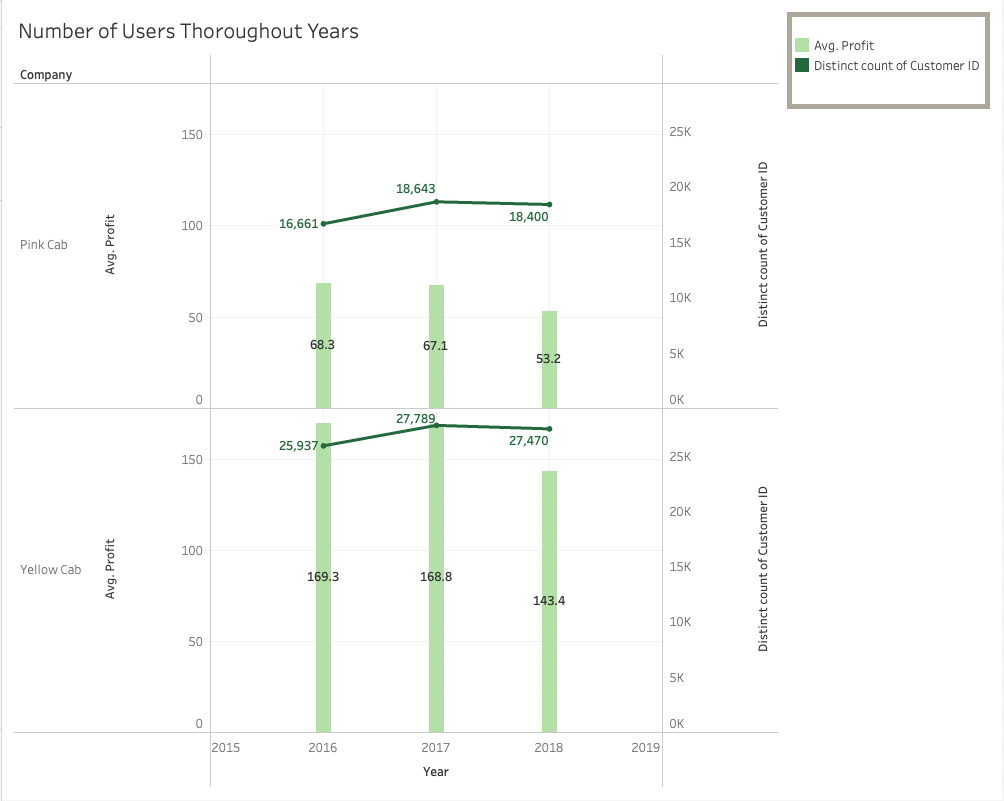

**It is surprising to see that for both companies, the number of customers does not have positive relationship with the average profits.In 2018, the number of users is higher than that in 2016. However, the mean average decreases a lot for both companies.**

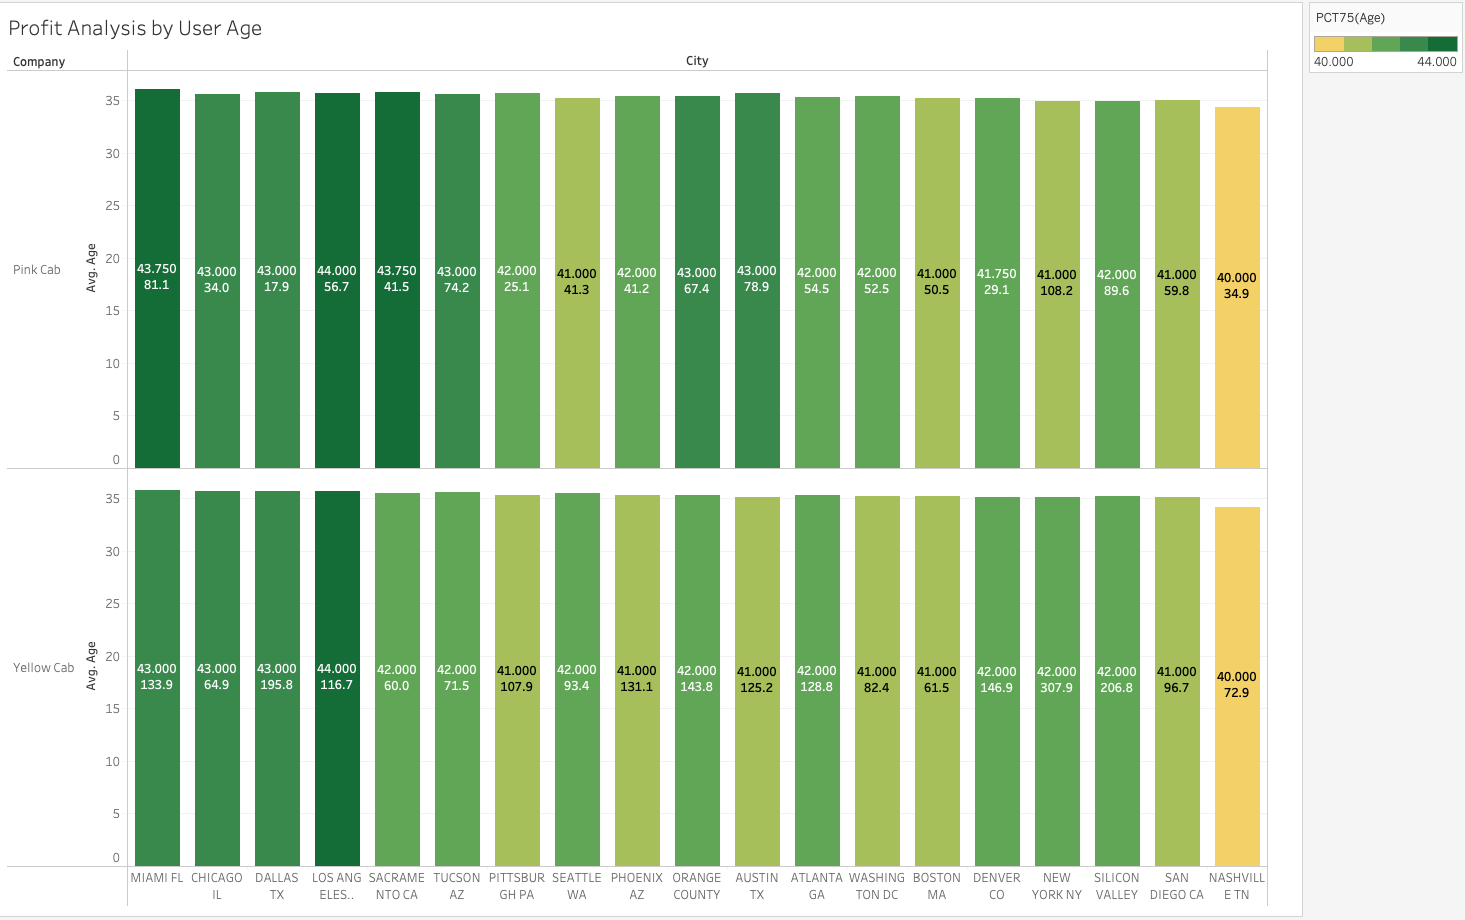

**There is no specific pattern for both companies overall. Generally speaking, Yellow Cab company has younger population of customers for most of the cities.**

### Assumption 5

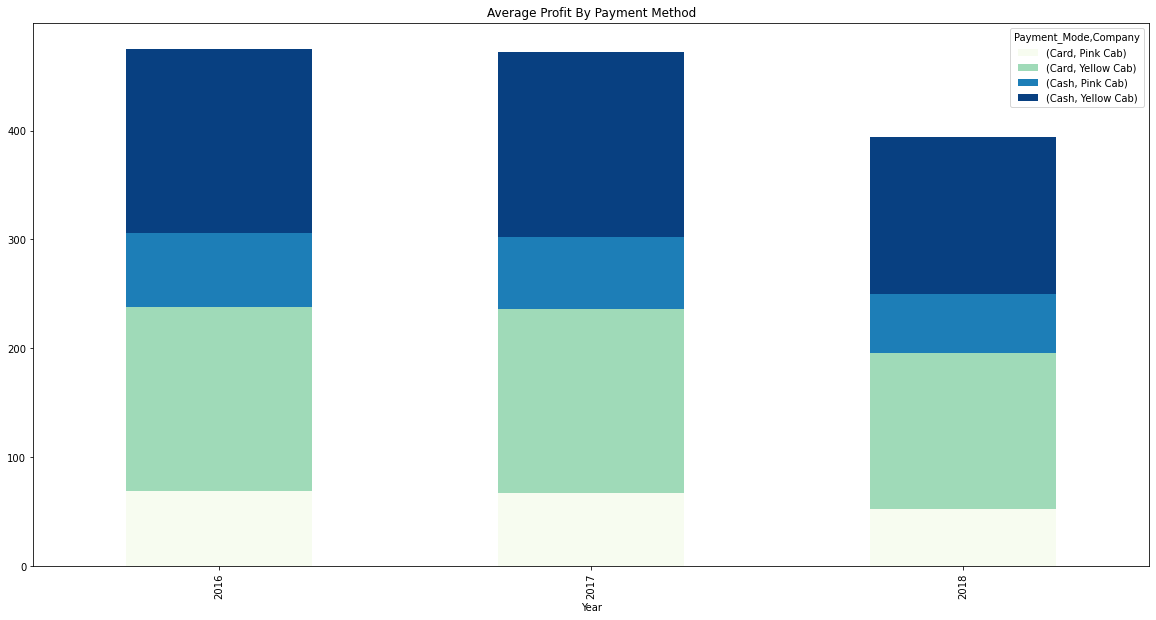

In [34]:
df_pivot = pd.pivot_table(df1, 
                          values="Profit", 
                          index="Year", 
                          columns=["Payment_Mode","Company"], 
                          aggfunc=np.mean)

colors = plt.cm.GnBu(np.linspace(0, 2, 6))
df_pivot.plot.bar(stacked=True, color=colors,figsize=(20, 10))
plt.title('Average Profit By Payment Method')
plt.show()

**It is clear to see that in all those three years, the profit generated by car payment overweights that generated by cash.Also, the profit of yellow cab exceeds that of pink cab. If we focus on the yellow cab's profits, it is clear that the major part is generated by card payment.**

#### By City

In [35]:
def plot(year):
    df_pivot = pd.pivot_table(df1[df1['Year'] == year], 
                          values="Profit", 
                          index="City", 
                          columns=['Company',"Payment_Mode"], 
                          aggfunc=np.mean)

    df_pivot = df_pivot.sort_values(by=('Yellow Cab','Card'), ascending=False).head(5)

    colors = plt.cm.GnBu(np.linspace(0, 2, 6))
    df_pivot.plot.bar(stacked=True, color=colors,figsize=(20, 10))
    plt.title(year + ' Average Profit By City and Company')
    plt.show()
    return

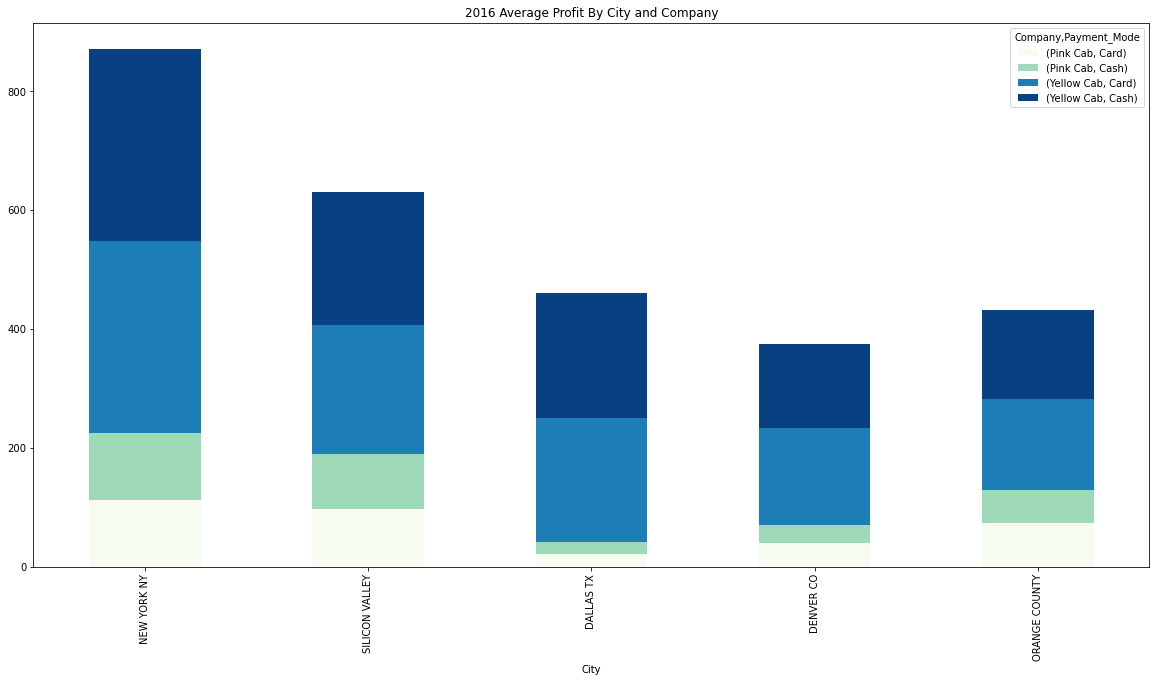

In [36]:
plot('2016')

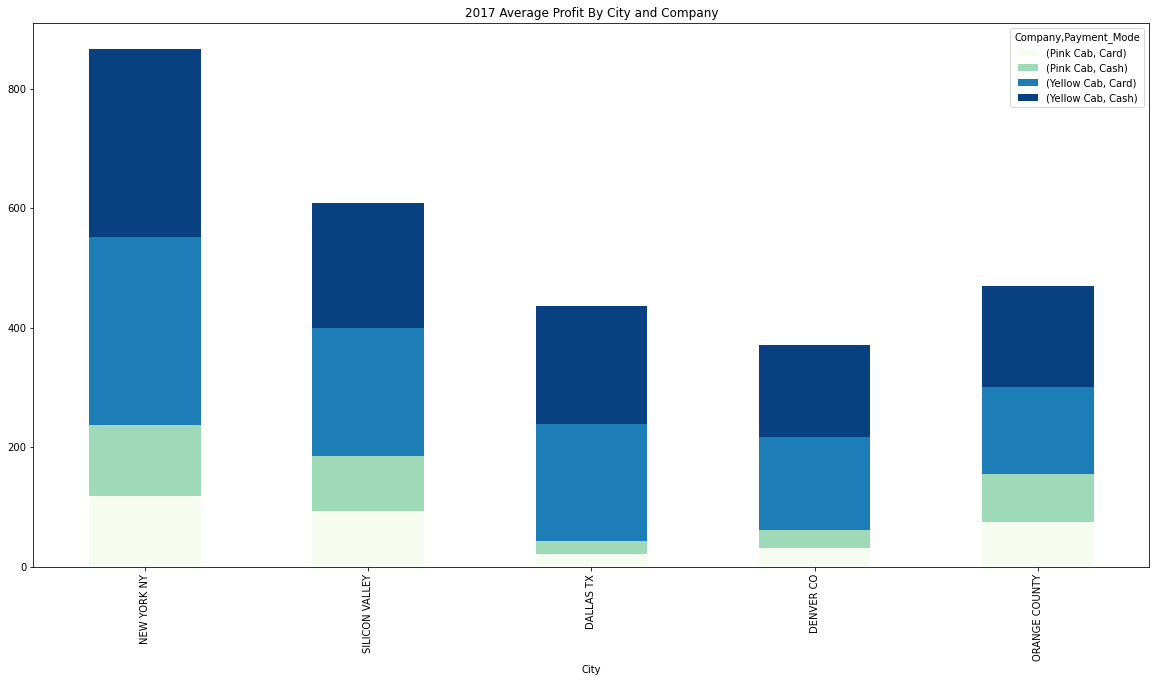

In [37]:
plot('2017')

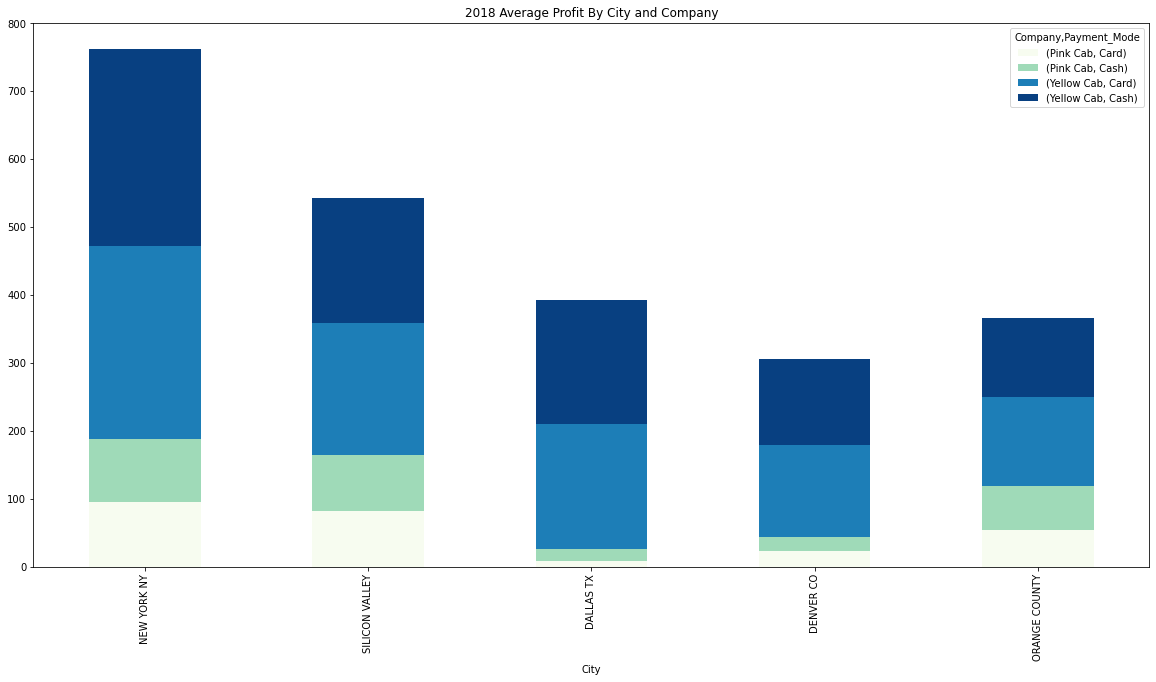

In [38]:
plot('2018')

**By digesting at the payment mode level, it is not evident what customer prefer as payment. For both companies, the difference of profits generated by each payment mode is neglectable.**

### Recommendation

To sum up, if we look from a more macro persepective, XYZ should invest in Yellow Cab as it has more profit generating power than Pink Cab and performs better from 2016 to 2018.